In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Data properties

Here we want to collect some general insights that we concluded and which might be interesting for working with the data.

This will be extended soon.

In [9]:
data = pd.read_csv("product/rivers_ts_east_germany.csv", index_col=0)
data2 = pd.read_csv("product/rivers_ts_bavaria.csv", index_col=0)
data3 = pd.read_csv("product/rivers_ts_flood.csv", index_col=0)

In [20]:
names = ["EastGermany", "Bavaria", "FloodSet"]

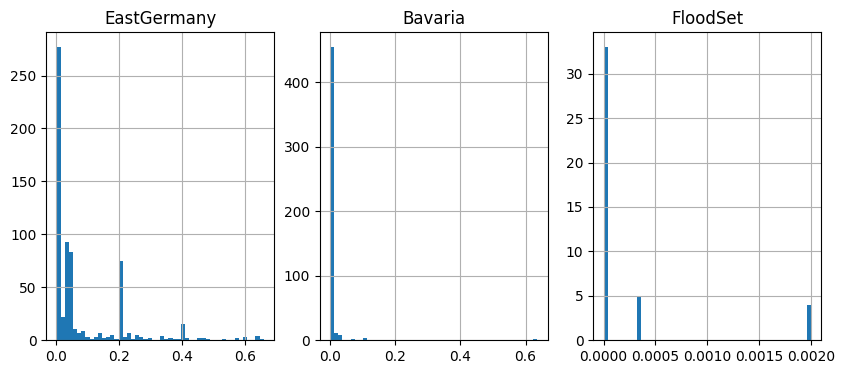

In [21]:
# Distribution of % of missing values
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
for n,d in enumerate([data,data2,data3]):
    _ = (d.isnull().sum() /len(d)).hist(bins=50,ax=axs[n])
    axs[n].set_title(names[n])


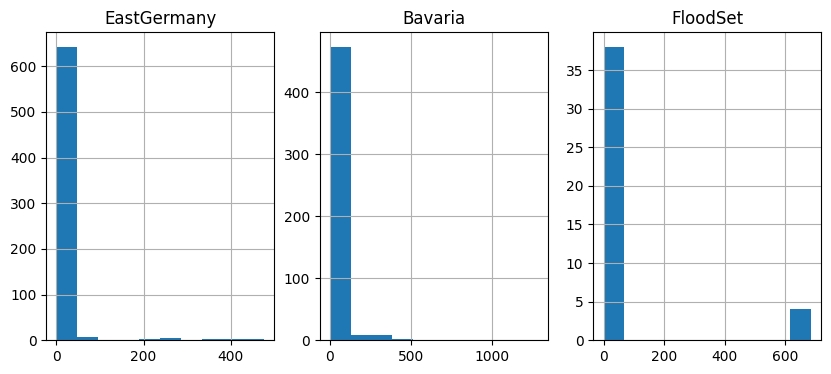

In [33]:
# Distribution of Absolute discharge values
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
for n,d in enumerate([data,data2,data3]):
    _ = d.mean().hist(bins=10,ax=axs[n])
    axs[n].set_title(names[n])

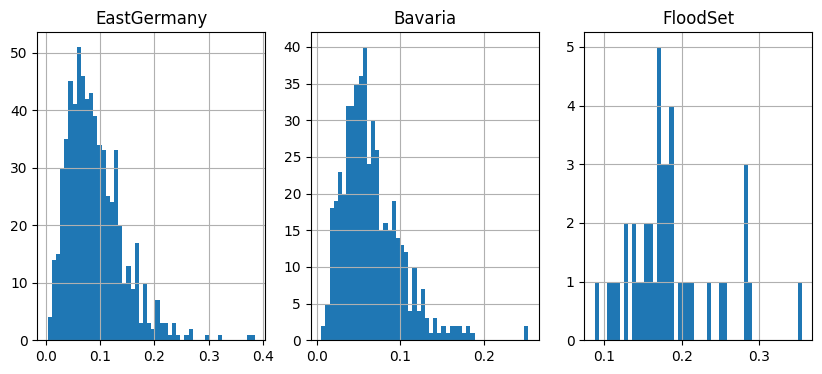

In [39]:
# Distribution of norm std
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
for n,d in enumerate([data,data2,data3]):
    norm = (d- d.min()) / (d.max()- d.min())
    _ = norm.std().hist(bins=50,ax=axs[n])
    axs[n].set_title(names[n])